# CS5950 Course Project

This project recaps and systematises work that has been done in practical sessions.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisatio, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Friday March 27th, 23:59pm**

This project has **5%** of the marks of the course.

Please write your student number **here**: 100932412    
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Keras, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

In [230]:
## Using the Cifar Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
%matplotlib inline
import tensorflow

# If running on your laptop execute this cell
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers

#Load cifar-10 image dataset. Details of the CIFAR-10 dataset can be found 
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

#cy_train.shape

(50000, 32, 32, 3)
(50000, 1)


(50000, 1)

### We will be using the Cifar Dataset

In [262]:
import pandas as pd
from pandas import read_csv

images = cx_train
labels = to_categorical(cy_train)


### This is the data split we are using: 3000 for the training set, 10000 for the validation/test test

In [263]:
from sklearn.model_selection import train_test_split

# # Train size of 3000
# # Test set of 10000
# x_train, x_dev, y_train, y_dev = train_test_split(images, labels,  train_size = 3000, test_size = 10000, stratify = labels, random_state = 500)

# #y_train.shape

#### Test Data size of 10000

data_r, test_data_r, data_labels_r, test_data_labels_r = train_test_split(images, labels, train_size = 3000, test_size = 10000, stratify = labels, random_state = 500)




## Set up model 

Set up a Keras model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

## Why We Choose a CNN with the following parameters:

#### We choose a CNN with only 2 hidden layers in order to speed up computation. Moreover, using a more complex CNN (the one form the MNIST CNN in lab 2) does not actually yield better accuracy on our validation set of size 10000.

In [271]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)

# We start by creating a CNN model

#This is a baseline model from the lab: We made add an additional layer or we may alter the size of the filters
model = models.Sequential()
filter_size = (3,3)

filters = 8
model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization()) 


filters = 16
model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.MaxPooling2D((2, 2)))

# filters = 32
#classification layers
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_223 (Bat (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 32, 32, 16)        1168      
_________________________________________________________________
batch_normalization_224 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_87 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_195 (Dense)            (None, 16)              

In [266]:
################## Fitting the first model #################
model.reset_states() 
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



## Dividing by 255 to make the pixel values between 0 and 1 ~ helps in the gradient descent step of optimization 
model_history = model.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model.save('model_lab')
#############################################################

Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 8s 3ms/sample - loss: 1.2164 - accuracy: 0.5843 - val_loss: 2.1363 - val_accuracy: 0.2235
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.6177 - accuracy: 0.7950 - val_loss: 2.1672 - val_accuracy: 0.1556
Epoch 3/30
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4386 - accuracy: 0.8487 - val_loss: 2.1086 - val_accuracy: 0.1885
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.3237 - accuracy: 0.8867 - val_loss: 1.9967 - val_accuracy: 0.1987
Epoch 5/30
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.2537 - accuracy: 0.9047 - val_loss: 1.5320 - val_accuracy: 0.3989
Epoch 6/30
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.1855 - accuracy: 0.9313 - val_loss: 1.1036 - val_accuracy: 0.6506
Epoch 7/30
3000/3000 [==============================] - 4s 1ms/sample - los

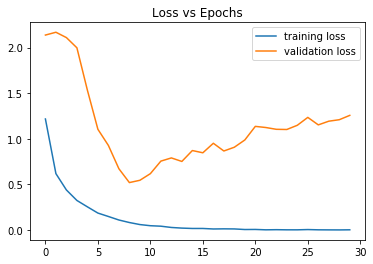

In [267]:
## Dense 128
plt.title("Loss vs Epochs")
plt.plot(range(30), model_history.history['loss'][0:30])
plt.plot(range(30), model_history.history['val_loss'][0:30])
plt.legend(['training loss', 'validation loss'])

### This model was trained on 3000 datapoints and tested on a validation set of size 10000. As you can see above, there is clear evidence of overfitting. Validation loss deceases after a certain point while training loss continuously decreases.

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, L1, L12, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [269]:
#### Testing Regularisation Part 1
####################### First Model With No Dropout   ####################### 

model1 = models.Sequential()
filter_size = (3,3)

filters = 8
model1.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization()) 


filters = 16
model1.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
model1.add(BatchNormalization()) 
model1.add(layers.MaxPooling2D((2, 2)))

# filters = 32
#classification layers
model1.add(layers.Flatten())
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

#######################################################################################################
######################################  Dropout on 2 Hidden Layer  #################################### 

model_dropout1 = models.Sequential()
filter_size = (3,3)

filters = 8
model_dropout1.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3)))
model_dropout1.add(layers.Dropout(0.5))
model_dropout1.add(BatchNormalization()) 



filters = 16
model_dropout1.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
model_dropout1.add(layers.Dropout(0.5))
model_dropout1.add(BatchNormalization()) 
model_dropout1.add(layers.MaxPooling2D((2, 2)))

# filters = 32
#classification layers
model_dropout1.add(layers.Flatten())
model_dropout1.add(layers.Dense(16, activation='relu'))
model_dropout1.add(layers.Dense(10, activation='softmax'))
model_dropout1#.summary()

#######################################################################################################
################################  Dropout on Everything including Input  ##############################


model_dropout2 = models.Sequential()

# This is really just an identity map from the inputs: We do this so we can add dropout to the input layer
model_dropout2.add(layers.Conv2D(1, (32, 32), strides=1, padding='same', input_shape=(32, 32, 3)))
model_dropout2.add(layers.Dropout(0.5))


filter_size = (3,3)
filters = 8
model_dropout2.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3)))
model_dropout2.add(layers.Dropout(0.5))
model_dropout2.add(BatchNormalization()) 



filters = 16
model_dropout2.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
model_dropout2.add(layers.Dropout(0.5))
model_dropout2.add(BatchNormalization()) 
model_dropout2.add(layers.MaxPooling2D((2, 2)))

# filters = 32
#classification layers
model_dropout2.add(layers.Flatten())
model_dropout2.add(layers.Dense(16, activation='relu'))
model_dropout2.add(layers.Dense(10, activation='softmax'))


In [259]:
################## Fitting the first model #################
model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model1_history = model1.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model1.save('model1')
#############################################################

############### Fitting the Second Model ####################
model_dropout1.reset_states() 
model_dropout1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_dropout1_history = model_dropout1.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))
model_dropout1.save('model2')
#############################################################

############### Fitting the Third Model #####################
model_dropout2.reset_states() 
model_dropout2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_dropout2_history = model_dropout2.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))
model_dropout2.save('model3')
#############################################################

Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 9s 3ms/sample - loss: 2.1470 - accuracy: 0.2127 - val_loss: 2.2775 - val_accuracy: 0.1439
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.8099 - accuracy: 0.3423 - val_loss: 2.4624 - val_accuracy: 0.1328
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.5629 - accuracy: 0.4167 - val_loss: 2.7492 - val_accuracy: 0.1322
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.3767 - accuracy: 0.4843 - val_loss: 2.6938 - val_accuracy: 0.1489
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.1990 - accuracy: 0.5487 - val_loss: 2.3251 - val_accuracy: 0.2312
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 1.0523 - accuracy: 0.6143 - val_loss: 2.2541 - val_accuracy: 0.2674
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/sample - los

Epoch 26/30
3000/3000 [==============================] - 10s 3ms/sample - loss: 1.1295 - accuracy: 0.5843 - val_loss: 2.1161 - val_accuracy: 0.3461
Epoch 27/30
3000/3000 [==============================] - 10s 3ms/sample - loss: 1.1114 - accuracy: 0.5923 - val_loss: 2.3636 - val_accuracy: 0.3225
Epoch 28/30
3000/3000 [==============================] - 10s 3ms/sample - loss: 1.0783 - accuracy: 0.6007 - val_loss: 2.3040 - val_accuracy: 0.3199
Epoch 29/30
3000/3000 [==============================] - 10s 3ms/sample - loss: 1.0420 - accuracy: 0.6140 - val_loss: 2.3612 - val_accuracy: 0.3286
Epoch 30/30
3000/3000 [==============================] - 12s 4ms/sample - loss: 1.0286 - accuracy: 0.6230 - val_loss: 2.2453 - val_accuracy: 0.3484
INFO:tensorflow:Assets written to: model2/assets
Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 132s 44ms/sample - loss: 2.4305 - accuracy: 0.0960 - val_loss: 2.3570 - val_accuracy: 0.0802
Epoch 2/30
30

KeyboardInterrupt: 

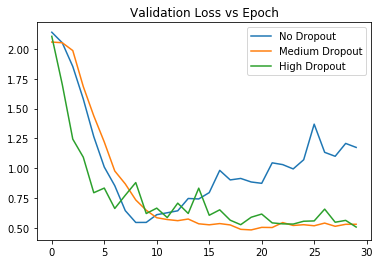

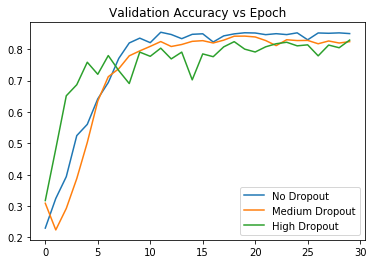

Text(0.5, 1.0, 'Training Loss vs Epoch')

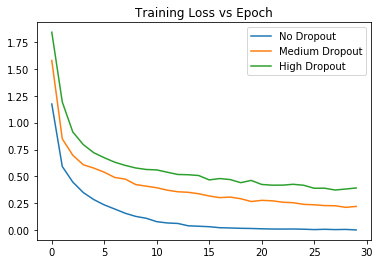

In [157]:
import matplotlib.pyplot as plt
acc1 = model1_history.history['val_accuracy']
acc2 = model_dropout1_history.history['val_accuracy']
acc3 = model_dropout2_history.history['val_accuracy']
epochs = range(30)


#plt.subplot(1, 2, 1)
plt.plot(epochs, model1_history.history['val_loss'])
plt.plot(epochs, model_dropout1_history.history['val_loss'])
plt.plot(epochs, model_dropout2_history.history['val_loss'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Validation Loss vs Epoch')
plt.show()
#model2_history.history
#model1_history.history

#plt.subplot(1, 2, 2)
plt.plot(epochs, model1_history.history['val_accuracy'])
plt.plot(epochs, model_dropout1_history.history['val_accuracy'])
plt.plot(epochs, model_dropout2_history.history['val_accuracy'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Validation Accuracy vs Epoch')
plt.show()

plt.plot(epochs, model1_history.history['loss'])
plt.plot(epochs, model_dropout1_history.history['loss'])
plt.plot(epochs, model_dropout2_history.history['loss'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Training Loss vs Epoch')


As you can see above regularization forces the model to learn a lot more slowly. To this effect, it is much more difficult to overfit on the data. As you can see in the last graph, the training loss is minimized much more quickly in a more complicated model. However, a models that are regularized demonstrate more gentle behavior in minimizing the validation loss (1st graph). The slope of the validation loss curves are more gentle since they start lower, though the minimum point is the same. This kind of behavior may be more desirable because it provides a larger range of epochs to select from for hyperparameter/loss-minimization selection. However, validation accuracy is best minimized by the most complicated model with no regularization. This seems to indicate that our model is already relatively simple to begin with and can be made more complicated for the given data. More importantly, the green curve in the 2nd graph which represents the model with heavy regularization possesses the lowest accuracy. This is evidence of a model that has been made much to simple by heavily penalizing for a complicated model and can be underfitting the data. This is further substantiated by the fact that the training loss (in the 3rd graph) is hardly able to approach a value below 0.5 after 30 epochs. This shows that the model struggles to even overfit on the training data and hence, it is not complex enough to adequately model for the given data. Thus, the optimal amount of regularization in our case seems to be the model with no regularization at all. 

However, another takeaway from these results is NOT the fact that the model was made too simple to begin with but rather, dropout is not a good method to couple with convolutional neural networks. Because CNNs have a spatial interpretation and dropout randomly sets inputs/neurons who's position have spatial importance, adding dropout removes important information from the data. 

Lastly, CNN's have a small amount of parameters to being with. Dropout makes CNN's more simple than need be leading to underfitting and lower validation accuracy.

While dropout does indeed reduce overfitting on the training set(as shown by the last graph), perhaps dropout is best used only for fully connected networks or, only layers that have no convolutional filter applied (e.g. the input layer). 

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [181]:
## Train Size is of Size 3000
from sklearn.model_selection import train_test_split
rest, holdout_test, rest_labels, holdout_test_labels = train_test_split(images, labels,  test_size = 10000, stratify = labels, random_state = 500)

## Validation Set Size of Size 3000
split_200, x, split_200_labels, y = train_test_split(rest, rest_labels,  train_size = 200, stratify = rest_labels)

split_1000, split_1000_test, split_1000_labels, split_1000_test_labels = train_test_split(rest, rest_labels,  train_size = 1000, stratify = rest_labels)

split_3000, split_3000_test, split_3000_labels, split_3000_test_labels = train_test_split(rest, rest_labels, train_size = 3000, stratify = rest_labels)

split_8000, split_8000_test, split_8000_labels, split_8000_test_labels = train_test_split(rest, rest_labels,  train_size = 8000, stratify = rest_labels)

split_15000, split_15000_test, split_15000_labels, split_15000_test_labels = train_test_split(rest, rest_labels,  train_size = 15000, stratify = rest_labels)

split_30000, split_30000_test, split_30000_labels, split_30000_test_labels = train_test_split(rest, rest_labels,  train_size = 30000, stratify = rest_labels)



### Below, in the interest of time for a  CPU limited computer, we only go as far as 5 epochs for each split of data

In [182]:

## I have selected model 1 (with no regularization) as it yielded the best validation accuracy.
model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model1_history1 = model1.fit(split_200/255,
                    split_200_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.1')


model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model1_history2 = model1.fit(split_1000/255,
                    split_1000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 20,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.2')


model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model1_history3 = model1.fit(split_3000/255,
                    split_3000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.3')


model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1_history4 = model1.fit(split_8000/255,
                    split_8000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 160,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.4')


model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1_history5 = model1.fit(split_15000/255,
                    split_15000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 300,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.5')


model1.reset_states() 
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1_history6 = model1.fit(split_30000/255,
                    split_30000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 600,
                    validation_data=(holdout_test/255, holdout_test_labels))

model1.save('model1.6')


Train on 200 samples, validate on 10000 samples
Epoch 1/15
200/200 [==============================] - 6s 32ms/sample - loss: 0.2090 - accuracy: 0.9650 - val_loss: 1.4972 - val_accuracy: 0.8924
Epoch 2/15
200/200 [==============================] - 3s 15ms/sample - loss: 0.0664 - accuracy: 0.9850 - val_loss: 1.5413 - val_accuracy: 0.8926
Epoch 3/15
200/200 [==============================] - 3s 15ms/sample - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.4936 - val_accuracy: 0.8948
Epoch 4/15
200/200 [==============================] - 3s 16ms/sample - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.4688 - val_accuracy: 0.8955
Epoch 5/15
200/200 [==============================] - 3s 15ms/sample - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.4588 - val_accuracy: 0.8951
Epoch 6/15
200/200 [==============================] - 3s 14ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4479 - val_accuracy: 0.8945
Epoch 7/15
200/200 [==============================] - 3s 15ms/sample - loss: 0.001

8000/8000 [==============================] - 9s 1ms/sample - loss: 0.0164 - accuracy: 0.9958 - val_loss: 1.1120 - val_accuracy: 0.8857
Epoch 10/15
8000/8000 [==============================] - 9s 1ms/sample - loss: 0.0148 - accuracy: 0.9951 - val_loss: 1.1730 - val_accuracy: 0.8889
Epoch 11/15
8000/8000 [==============================] - 9s 1ms/sample - loss: 0.0126 - accuracy: 0.9958 - val_loss: 1.1373 - val_accuracy: 0.8899
Epoch 12/15
8000/8000 [==============================] - 8s 1ms/sample - loss: 0.0115 - accuracy: 0.9960 - val_loss: 1.2349 - val_accuracy: 0.8884
Epoch 13/15
8000/8000 [==============================] - 8s 980us/sample - loss: 0.0105 - accuracy: 0.9965 - val_loss: 1.2521 - val_accuracy: 0.8902
Epoch 14/15
8000/8000 [==============================] - 8s 1ms/sample - loss: 0.0119 - accuracy: 0.9970 - val_loss: 1.2652 - val_accuracy: 0.8885
Epoch 15/15
8000/8000 [==============================] - 8s 996us/sample - loss: 0.0077 - accuracy: 0.9976 - val_loss: 1.2944 - 

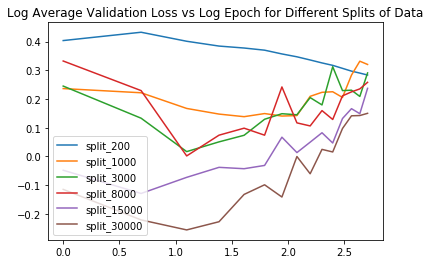

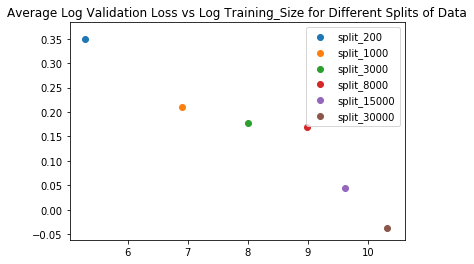

In the graph above, larger training size does indeed warrant better accuracy and smaller validation loss. The  rate of improvement looks very gently exponential. However, the inflections at 8 and 9 as shown by the graph below make it difficult to completely warrant this conclusion. It is worth noting that the validation hold out set is the same for all splits of data and has a size of 10000 entries. None of the splits of data have data that overlap with this validation set.


In [210]:
epoc = np.array(list(range(15))) + 1
plt.plot(np.log(epoc), np.log((model1_history1.history['val_loss'])) )
plt.plot(np.log(epoc), np.log((model1_history2.history['val_loss'] ))  )
plt.plot(np.log(epoc), np.log((model1_history3.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model1_history4.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model1_history5.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model1_history6.history['val_loss']))  )
plt.legend(['split_200', 'split_1000', 'split_3000', 'split_8000', 'split_15000', 'split_30000'])
plt.title('Log Average Validation Loss vs Log Epoch for Different Splits of Data')
plt.show()

plt.scatter(np.log(200), np.log  (np.mean((model1_history1.history['val_loss'])))    )
plt.scatter(np.log(1000), np.log(np.mean((model1_history2.history['val_loss'] )) )        )
plt.scatter(np.log(3000), np.log(np.mean((model1_history3.history['val_loss'])) )      )
plt.scatter(np.log(8000), np.log(np.mean((model1_history4.history['val_loss'])) )    )
plt.scatter(np.log(15000), np.log(np.mean((model1_history5.history['val_loss'])) )   )
plt.scatter(np.log(30000), np.log(np.mean((model1_history6.history['val_loss'])) )      )
plt.legend(['split_200', 'split_1000', 'split_3000', 'split_8000', 'split_15000', 'split_30000'])
plt.title('Average Log Validation Loss vs Log Training_Size for Different Splits of Data')
plt.show()

print("In the graph above, larger training size does indeed warrant better accuracy and smaller validation loss. \
The  rate of improvement looks very gently exponentially decreasing. However, the inflections at 8 and 9 as shown by the graph below \
make it difficult to completely warrant this conclusion. It is worth noting that the validation hold out set is the \
same for all splits of data and has a size of 10000 entries. None of the splits of data have data that overlap with this validation set.") 


### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeata sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  


### Fully Connected Network: 2 Hidden Layers

#### We are still using the same data split: 3000 for training and 10000 for validation as requested

In [ ]:
data_r, test_data_r, data_labels_r, test_data_labels_r = train_test_split(images, labels, train_size = 3000, test_size = 10000, stratify = labels, random_state = 500)

In [272]:
################### THE FULLY CONNECTED MODEL ######################
model_fully_connected = models.Sequential()
model_fully_connected.add(layers.Flatten(input_shape = (32, 32, 3)))
#model_fully_connected.add(Dropout(0.5))
model_fully_connected.add(BatchNormalization())


## 1st Hidden Layer
model_fully_connected.add(layers.Dense(100, activation = 'relu'))
model_fully_connected.add(BatchNormalization())

## 2nd Hidden Layer
model_fully_connected.add(layers.Dense(100, activation = 'relu'))
model_fully_connected.add(BatchNormalization())

## Output Layer
model_fully_connected.add(layers.Dense(10, activation='softmax'))

model_fully_connected.summary()

################### THE FULLY CONNECTED MODEL ######################

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_88 (Flatten)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_225 (Bat (None, 3072)              12288     
_________________________________________________________________
dense_197 (Dense)            (None, 100)               307300    
_________________________________________________________________
batch_normalization_226 (Bat (None, 100)               400       
_________________________________________________________________
dense_198 (Dense)            (None, 100)               10100     
_________________________________________________________________
batch_normalization_227 (Bat (None, 100)               400       
_________________________________________________________________
dense_199 (Dense)            (None, 10)              

In [34]:
################## Fitting the first model #################
model_fully_connected.reset_states() 
model_fully_connected.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



## Dividing by 255 to make the pixel values between 0 and 1 ~ helps in the gradient descent step of optimization 
model_fully_connected_history = model_fully_connected.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model_fully_connected.save('model_fully_connected')
#############################################################

##Echo

Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 7s 2ms/sample - loss: 0.8294 - accuracy: 0.7110 - val_loss: 1.2793 - val_accuracy: 0.7142
Epoch 2/30
3000/3000 [==============================] - 2s 739us/sample - loss: 0.5030 - accuracy: 0.8203 - val_loss: 0.8895 - val_accuracy: 0.7596
Epoch 3/30
3000/3000 [==============================] - 2s 717us/sample - loss: 0.4244 - accuracy: 0.8457 - val_loss: 0.6535 - val_accuracy: 0.7858
Epoch 4/30
3000/3000 [==============================] - 2s 742us/sample - loss: 0.3393 - accuracy: 0.8783 - val_loss: 0.5241 - val_accuracy: 0.8213
Epoch 5/30
3000/3000 [==============================] - 2s 745us/sample - loss: 0.3034 - accuracy: 0.8947 - val_loss: 0.5174 - val_accuracy: 0.8200
Epoch 6/30
3000/3000 [==============================] - 2s 739us/sample - loss: 0.2650 - accuracy: 0.9070 - val_loss: 0.5536 - val_accuracy: 0.8025
Epoch 7/30
3000/3000 [==============================] - 2s 717us/

## Repeating Section 2: Splitting for different amounts of regularization

In [201]:
######################## No Dropout #########################
model_fully_connected = models.Sequential()
model_fully_connected.add(layers.Flatten(input_shape = (32, 32, 3)))
model_fully_connected.add(BatchNormalization())


## 1st Hidden Layer
model_fully_connected.add(layers.Dense(100, activation = 'relu'))
model_fully_connected.add(BatchNormalization())

## 2nd Hidden Layer
model_fully_connected.add(layers.Dense(100, activation = 'relu'))
model_fully_connected.add(BatchNormalization())

## Output Layer
model_fully_connected.add(layers.Dense(10, activation='softmax'))

#############################################################


############### Dropout on Second Hidden Layer ################
model_fully_connected2 = models.Sequential()
model_fully_connected2.add(layers.Flatten(input_shape = (32, 32, 3)))
model_fully_connected2.add(BatchNormalization())


## 1st Hidden Layer
model_fully_connected2.add(layers.Dense(100, activation = 'relu'))
model_fully_connected2.add(BatchNormalization())
model_fully_connected2.add(layers.Dropout(0.5))

## 2nd Hidden Layer
model_fully_connected2.add(layers.Dense(100, activation = 'relu'))
model_fully_connected2.add(BatchNormalization())


## Output Layer
model_fully_connected2.add(layers.Dense(10, activation='softmax'))

#############################################################

############### Dropout on Both Hidden Layers and  Input ################
model_fully_connected3 = models.Sequential()
model_fully_connected3.add(layers.Flatten(input_shape = (32, 32, 3)))
model_fully_connected3.add(layers.Dropout(0.5))
model_fully_connected3.add(BatchNormalization())



## 1st Hidden Layer
model_fully_connected3.add(layers.Dense(100, activation = 'relu'))
model_fully_connected3.add(BatchNormalization())
model_fully_connected3.add(layers.Dropout(0.5))

## 2nd Hidden Layer
model_fully_connected3.add(layers.Dense(100, activation = 'relu'))
model_fully_connected3.add(BatchNormalization())
model_fully_connected3.add(layers.Dropout(0.5))


## Output Layer
model_fully_connected3.add(layers.Dense(10, activation='softmax'))

#############################################################




In [202]:
################## Fitting the first model #################
model_fully_connected.reset_states() 
model_fully_connected.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_history = model_fully_connected.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model_fully_connected.save('model_fully_connected')
#############################################################

############### Fitting the Second Model ####################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_history2 = model_fully_connected2.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model_fully_connected2.save('model_fully_connected2')
############################################################

############### Fitting the Third Model #####################
model_fully_connected3.reset_states() 
model_fully_connected3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_history3 = model_fully_connected3.fit(data_r/255,
                    data_labels_r,
                    epochs=30,
                    batch_size = 50,
                    steps_per_epoch = 60,
                    validation_data=(test_data_r/255, test_data_labels_r))

model_fully_connected3.save('model_fully_connected3')
#############################################################

Train on 3000 samples, validate on 10000 samples
Epoch 1/30
3000/3000 [==============================] - 7s 2ms/sample - loss: 2.1690 - accuracy: 0.3220 - val_loss: 1.2756 - val_accuracy: 0.6348
Epoch 2/30
3000/3000 [==============================] - 3s 855us/sample - loss: 1.4062 - accuracy: 0.5230 - val_loss: 0.8640 - val_accuracy: 0.7169
Epoch 3/30
3000/3000 [==============================] - 3s 902us/sample - loss: 1.1589 - accuracy: 0.5927 - val_loss: 0.7038 - val_accuracy: 0.7460
Epoch 4/30
3000/3000 [==============================] - 3s 838us/sample - loss: 1.0289 - accuracy: 0.6290 - val_loss: 0.6444 - val_accuracy: 0.7632
Epoch 5/30
3000/3000 [==============================] - 3s 899us/sample - loss: 0.9648 - accuracy: 0.6637 - val_loss: 0.6191 - val_accuracy: 0.7704
Epoch 6/30
3000/3000 [==============================] - 3s 959us/sample - loss: 0.9130 - accuracy: 0.6700 - val_loss: 0.5957 - val_accuracy: 0.7805
Epoch 7/30
3000/3000 [==============================] - 3s 835us/

## Plotting the Regularisation Results

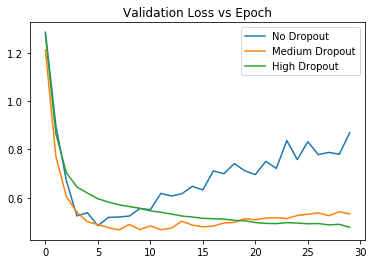

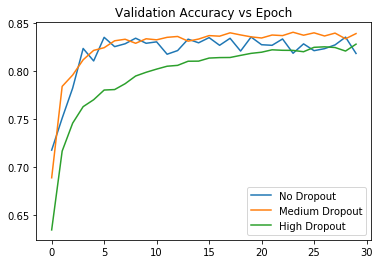

Text(0.5, 1.0, 'Training Loss vs Epoch')

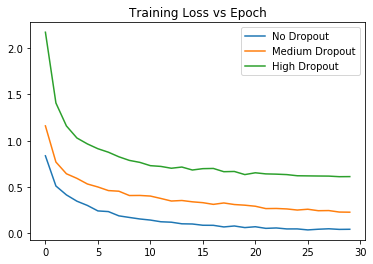

In [204]:
import matplotlib.pyplot as plt


acc1 = model_fully_connected_history.history['val_accuracy']
acc2 = model_fully_connected_history2.history['val_accuracy']
acc3 = model_fully_connected_history3.history['val_accuracy']
epochs = range(30)


#plt.subplot(3, 2, 1)
plt.plot(epochs, model_fully_connected_history.history['val_loss'])
plt.plot(epochs, model_fully_connected_history2.history['val_loss'])
plt.plot(epochs, model_fully_connected_history3.history['val_loss'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Validation Loss vs Epoch')
plt.show()

#plt.subplot(3, 2, 3)
plt.plot(epochs, model_fully_connected_history.history['val_accuracy'])
plt.plot(epochs, model_fully_connected_history2.history['val_accuracy'])
plt.plot(epochs, model_fully_connected_history3.history['val_accuracy'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Validation Accuracy vs Epoch')
plt.show()

#plt.subplot(3, 2, 3)
plt.plot(epochs, model_fully_connected_history.history['loss'])
plt.plot(epochs, model_fully_connected_history2.history['loss'])
plt.plot(epochs, model_fully_connected_history3.history['loss'])
plt.legend(['No Dropout', 'Medium Dropout', 'High Dropout'])
plt.title('Training Loss vs Epoch')

Medium dropout (dropout performed only on the 1st hidden layer) displays the best results in terms of both validation accuracy and validation loss.

Due to the slowly learning rate displayed by the learning curve in the 3rd graph ("Training Loss vs Epoch"), it seems that dropout performed on every layer actually results in underfitting. Indeed, this is validated by the fact that high dropout has the lowest validation accuracy. However, it is able to achieve the lowest validation loss. Perhaps the reason it obtains lower accuracy is that it learns at a much slower rate due to the simplicity of the model. Further epochs would probably yield better validation accuracy. 

When comparing the FULLY CONNECTED MODEL to the CNN, it is clear that dropout improves a fully connected model's performance as compared to that of a CNN, which is actually detrimental to predictive power. 

Text(0, 0.5, 'Epoch')

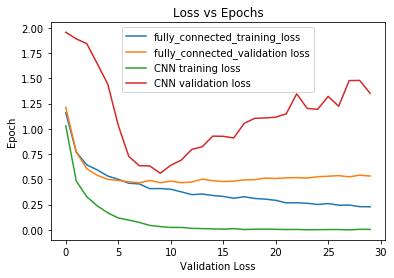

In [226]:
plt.title("Loss vs Epochs")
plt.plot(range(30), model_fully_connected_history2.history['loss'])
plt.plot(range(30), model_fully_connected_history2.history['val_loss'])
#plt.legend(['training loss', 'validation loss'])
plt.title('Validation/Train Loss for Fully Connected')

plt.title("Loss vs Epochs")
plt.plot(range(30), model_history.history['loss'][0:30])
plt.plot(range(30), model_history.history['val_loss'][0:30])
plt.legend(['fully_connected_training_loss', 'fully_connected_validation loss', 'CNN training loss', 'CNN validation loss'])
plt.xlabel('Validation Loss')
plt.ylabel('Epoch')

Clearly, the fully_connected model with 1 layer of dropout performs much better than the best CNN model in terms of validation accuracy. 

This could occur for a few reasons: the CNN is actually underfitting. However, its validation loss increases at a rate that is faster than that of the fully connected network. This tends to be a sign of overfitting. To this point, however, the fully connected network has almost double the number of parameters than that of the CNN. This differential in accuracy likely has to do with the number of layers, number of filters used, and size of the filters.

We can also see that the fully connected model learns much faster and its validation loss deteriorates at a much slower rate than the CNN. This is a bizarre finding considering the fact that we know that CNNs are much better more machine vision. Second, we also know that the CNN has less parameters which means its a simpler model. Simpler models in general have more stable slower-deteriorating validation accuracies. 

# Repeat Section 3 AND Compare Learning Curves between Models
## I. Loss vs. Various Training Sizes and Plot curves from both Models on the same graph
### a. We will use the same data splits of 200, 1000, 3000, 8000, 15000, and 30000 from Section 3 Part 1
### b. We will be using the fully connected networth with only 1 layer of dropout for this section 

In [208]:
######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h1 = model_fully_connected2.fit(split_200/255,
                    split_200_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))


######################################################################

######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h2 = model_fully_connected2.fit(split_1000/255,
                    split_1000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))


######################################################################

######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h3 = model_fully_connected2.fit(split_3000/255,
                    split_3000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))


######################################################################

######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h4 = model_fully_connected2.fit(split_8000/255,
                    split_8000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))


######################################################################

######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h5 = model_fully_connected2.fit(split_15000/255,
                    split_15000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))

######################################################################

######################################################################
model_fully_connected2.reset_states() 
model_fully_connected2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_fully_connected_h6 = model_fully_connected2.fit(split_30000/255,
                    split_30000_labels,
                    epochs=15,
                    batch_size = 50,
                    steps_per_epoch = 4,
                    validation_data=(holdout_test/255, holdout_test_labels))


######################################################################

Train on 200 samples, validate on 10000 samples
Epoch 1/15
200/200 [==============================] - 5s 23ms/sample - loss: 0.2970 - accuracy: 0.9400 - val_loss: 1.2052 - val_accuracy: 0.6692
Epoch 2/15
200/200 [==============================] - 1s 7ms/sample - loss: 0.2995 - accuracy: 0.9100 - val_loss: 1.1653 - val_accuracy: 0.6830
Epoch 3/15
200/200 [==============================] - 1s 7ms/sample - loss: 0.2178 - accuracy: 0.9400 - val_loss: 1.0964 - val_accuracy: 0.6841
Epoch 4/15
200/200 [==============================] - 1s 6ms/sample - loss: 0.1773 - accuracy: 0.9650 - val_loss: 1.0356 - val_accuracy: 0.7113
Epoch 5/15
200/200 [==============================] - 1s 7ms/sample - loss: 0.1721 - accuracy: 0.9600 - val_loss: 1.0038 - val_accuracy: 0.7081
Epoch 6/15
200/200 [==============================] - 1s 7ms/sample - loss: 0.1815 - accuracy: 0.9450 - val_loss: 0.9957 - val_accuracy: 0.7179
Epoch 7/15
200/200 [==============================] - 1s 6ms/sample - loss: 0.1321 - ac

 200/8000 [..............................] - ETA: 53s - loss: 0.5696 - accuracy: 0.7750 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Train on 15000 samples, validate on 10000 samples
Epoch 1/15
  200/15000 [..............................] - ETA: 1:37 - loss: 0.6855 - accuracy: 0.7850 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00Train on 30000 samples, validate on 10000 samples
Epoch 1/15
  200/30000 [..............................] - ETA: 3:54 - loss: 0.6290 - accuracy: 0.7900 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

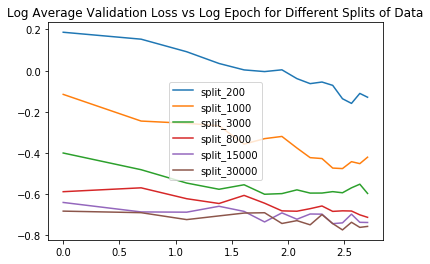

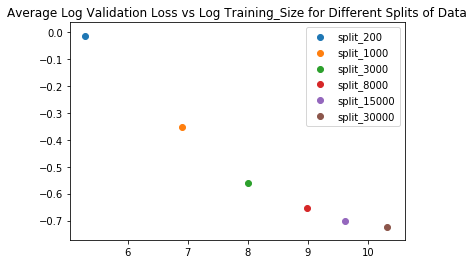

In [219]:
epoc = np.array(list(range(15))) + 1
plt.plot(np.log(epoc), np.log((model_fully_connected_h1.history['val_loss'])) )
plt.plot(np.log(epoc), np.log((model_fully_connected_h2.history['val_loss'] ))  )
plt.plot(np.log(epoc), np.log((model_fully_connected_h3.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model_fully_connected_h4.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model_fully_connected_h5.history['val_loss']))  )
plt.plot(np.log(epoc), np.log((model_fully_connected_h6.history['val_loss']))  )
plt.legend(['split_200', 'split_1000', 'split_3000', 'split_8000', 'split_15000', 'split_30000'])
plt.title('Log Average Validation Loss vs Log Epoch for Different Splits of Data')
plt.show()

plt.scatter(np.log(200), np.log  (np.mean((model_fully_connected_h1.history['val_loss'])))    )
plt.scatter(np.log(1000), np.log(np.mean((model_fully_connected_h2.history['val_loss'] )) )        )
plt.scatter(np.log(3000), np.log(np.mean((model_fully_connected_h3.history['val_loss'])) )      )
plt.scatter(np.log(8000), np.log(np.mean((model_fully_connected_h4.history['val_loss'])) )    )
plt.scatter(np.log(15000), np.log(np.mean((model_fully_connected_h5.history['val_loss'])) )   )
plt.scatter(np.log(30000), np.log(np.mean((model_fully_connected_h6.history['val_loss'])) )      )
plt.legend(['split_200', 'split_1000', 'split_3000', 'split_8000', 'split_15000', 'split_30000'])
plt.title('Average Log Validation Loss vs Log Training_Size for Different Splits of Data')
plt.show()




Compared to the CNN Model, the fully connected network also displays improvement to the learning rate with relationship to the size of the training set but this time with a clear exponential decrease to the rate of improvement. 



Text(0, 0.5, 'Average Log Validation Loss')

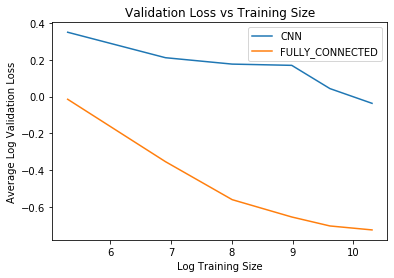

In [218]:
cnn_lr = np.array([np.log(np.mean((model1_history1.history['val_loss']))),    
np.log  (np.mean((model1_history2.history['val_loss'])))   ,        
np.log  (np.mean((model1_history3.history['val_loss'])))   ,      
np.log  (np.mean((model1_history4.history['val_loss'])))   ,    
np.log  (np.mean((model1_history5.history['val_loss'])))   , 
np.log  (np.mean((model1_history6.history['val_loss'])))   ]) 

fully_connected_lr = np.array([np.log(np.mean((model_fully_connected_h1.history['val_loss']))),    
np.log(np.mean((model_fully_connected_h2.history['val_loss']))),        
np.log(np.mean((model_fully_connected_h3.history['val_loss']))),      
np.log(np.mean((model_fully_connected_h4.history['val_loss']))),    
np.log(np.mean((model_fully_connected_h5.history['val_loss']))), 
np.log(np.mean((model_fully_connected_h6.history['val_loss'])))])       

train_size = np.array([np.log(200), np.log(1000), np.log(3000), np.log(8000), np.log(15000), np.log(30000)]) 

plt.plot(train_size, cnn_lr)
plt.plot(train_size, fully_connected_lr)
plt.legend(["CNN", "FULLY_CONNECTED"])
plt.title('Validation Loss vs Training Size')
plt.xlabel('Log Training Size')
plt.ylabel('Average Log Validation Loss')


As you can see above, the fully connected network has a significantly larger reduction of error-rate with 
respect to the training size.


Question Answered Above: Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  